In [24]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import json

In [ ]:
# getting the first page of 200 movies
page = requests.get("https://www.themoviedb.org/movie/top-rated?language=en-US")
# converting page into readable text file
soup = BeautifulSoup(page.content, "html.parser")
# umcomment to see html as text file
# print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <title>
   Top Rated Movies — The Movie Database (TMDB)
  </title>
  <meta content="on" http-equiv="cleartype"/>
  <meta charset="utf-8"/>
  <meta content="Movies, TV Shows, Streaming, Reviews, API, Actors, Actresses, Photos, User Ratings, Synopsis, Trailers, Teasers, Credits, Cast" name="keywords"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="The Movie Database (TMDB) is a popular, user editable database for movies and TV shows." name="description"/>
  <meta content="/assets/2/v4/icons/mstile-144x144-30e7905a8315a080978ad6aeb71c69222b72c2f75d26dab1224173a96fecc962.png" name="msapplication-TileImage"/>
  <meta content="#032541" name="msapplication-TileColor"/>
  <meta content="#032541" name="theme-color"/>
  <link href="/assets/2/apple-touch-icon-57ed4b3b0450fd5e9a0c20f34e81

In [ ]:
# creating an empty list to store individual movies' websites
website = []
# looping through links on the page to get a list of links for each movie
for a in soup.find_all('a', href=True)[270:313:3]: # indexing by 2s because there are two links on each row
    website.append("https://www.themoviedb.org" + a['href']) # concatenating main html link with query string
# print(website)

['https://www.themoviedb.org/movie/238-the-godfather?language=en-US', 'https://www.themoviedb.org/movie/1022256-selena-gomez-my-mind-me?language=en-US', 'https://www.themoviedb.org/movie/240-the-godfather-part-ii?language=en-US', 'https://www.themoviedb.org/movie/424-schindler-s-list?language=en-US', 'https://www.themoviedb.org/movie/1412113-2?language=en-US', 'https://www.themoviedb.org/movie/389-12-angry-men?language=en-US', 'https://www.themoviedb.org/movie/129?language=en-US', 'https://www.themoviedb.org/movie/19404?language=en-US', 'https://www.themoviedb.org/movie/155-the-dark-knight?language=en-US', 'https://www.themoviedb.org/movie/497-the-green-mile?language=en-US', 'https://www.themoviedb.org/movie/1356039-contraataque?language=en-US', 'https://www.themoviedb.org/movie/496243?language=en-US', 'https://www.themoviedb.org/movie/680-pulp-fiction?language=en-US', 'https://www.themoviedb.org/movie/372058?language=en-US', 'https://www.themoviedb.org/movie/122-the-lord-of-the-rings-

In [ ]:
# looking at a single movie link
link2 = "https://www.themoviedb.org/movie/1022256-selena-gomez-my-mind-me?language=en-US"
page2 = requests.get(link2)
soup2 = BeautifulSoup(page2.content, "html.parser")
# print(soup2.prettify())


<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <title>
   Selena Gomez: My Mind &amp; Me (2022) — The Movie Database (TMDB)
  </title>
  <meta content="on" http-equiv="cleartype"/>
  <meta charset="utf-8"/>
  <meta content="Movies, TV Shows, Streaming, Reviews, API, Actors, Actresses, Photos, User Ratings, Synopsis, Trailers, Teasers, Credits, Cast" name="keywords"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="After years in the limelight, Selena Gomez achieves unimaginable stardom. But just as she reaches a new peak, an unexpected turn pulls her into darkness. This uniquely raw and intimate documentary spans her six-year journey into a new light." name="description"/>
  <meta content="/assets/2/v4/icons/mstile-144x144-30e7905a8315a080978ad6aeb71c69222b72c2f75d26dab1224173a96fecc962.png" name="msapplication-TileImage"/>


In [28]:
listy = soup2.find("div", class_="user_score_chart") # finding list of all money amounts on page
data_percent = listy.get('data-percent')
meta_tag = soup2.find('meta', attrs={'property':'og:title'})
title = meta_tag.get('content') # Extract the content attribute

In [ ]:
titles_ratings = {}
# extracting data from each movie's individual website
for i in range(len(website)):
    page = requests.get(website[i])
    soup = BeautifulSoup(page.content, "html.parser")
    listy = soup.find("div", class_="user_score_chart") # finding list of all money amounts on page
    data_percent = listy.get('data-percent')
    meta_tag = soup.find('meta', attrs={'property':'og:title'})
    title = meta_tag.get('content') # Extract the content attribute
    titles_ratings[title] = {"rating": data_percent, "genres" : []}

# print(titles_ratings)
    

{'The Godfather': {'rating': '87', 'genres': []}, 'Selena Gomez: My Mind & Me': {'rating': '87', 'genres': []}, 'The Godfather Part II': {'rating': '86', 'genres': []}, "Schindler's List": {'rating': '86', 'genres': []}, 'Squid Game: Making Season 2': {'rating': '86', 'genres': []}, '12 Angry Men': {'rating': '85', 'genres': []}, 'Spirited Away': {'rating': '85', 'genres': []}, 'Dilwale Dulhania Le Jayenge': {'rating': '85', 'genres': []}, 'The Dark Knight': {'rating': '85', 'genres': []}, 'The Green Mile': {'rating': '85', 'genres': []}, 'Counterattack': {'rating': '85', 'genres': []}, 'Parasite': {'rating': '85', 'genres': []}, 'Pulp Fiction': {'rating': '85', 'genres': []}, 'Your Name.': {'rating': '85', 'genres': []}, 'The Lord of the Rings: The Return of the King': {'rating': '85', 'genres': []}}


In [30]:
# storing movie titles and their ratings as a hashmap in a new file
with open('title_ratings.txt', 'w') as title_ratings: 
     title_ratings.write(json.dumps(titles_ratings))

In [31]:
import random

def get_movie_recommendations(movie_dict, fav_movie, exploration_pct):
    if fav_movie not in movie_dict:
        print("Movie not found in database.")
        return []
    
    fav_genres = set(movie_dict[fav_movie]['genres'])
    
    # Categorizing movies based on genre similarity
    same_genre_movies = []
    similar_genre_movies = []
    different_genre_movies = []
    
    for movie, details in movie_dict.items():
        if movie == fav_movie:
            continue
        movie_genres = set(details['genres'])
        
        if fav_genres == movie_genres:
            same_genre_movies.append((movie, details['rating']))
        elif fav_genres & movie_genres:
            similar_genre_movies.append((movie, details['rating']))
        else:
            different_genre_movies.append((movie, details['rating']))
    
    # Sorting movies by rating
    same_genre_movies.sort(key=lambda x: x[1], reverse=True)
    similar_genre_movies.sort(key=lambda x: x[1], reverse=True)
    different_genre_movies.sort(key=lambda x: x[1], reverse=True)
    
    # Selecting recommendations based on exploration percentage
    recommendations = []
    
    if exploration_pct <= 20:
        recommendations = same_genre_movies[:5]
    elif exploration_pct <= 50:
        recommendations = (same_genre_movies[:3] + similar_genre_movies[:2])[:5]
    else:
        recommendations = (same_genre_movies[:2] + similar_genre_movies[:2] + different_genre_movies[:1])[:5]
    
    return [movie for movie, _ in recommendations]

# Sample movie database
movie_db = {
    "Inception": {"rating": 8.8, "genres": ["Sci-Fi", "Thriller"]},
    "Interstellar": {"rating": 8.6, "genres": ["Sci-Fi", "Drama"]},
    "The Matrix": {"rating": 8.7, "genres": ["Sci-Fi", "Action"]},
    "The Dark Knight": {"rating": 9.0, "genres": ["Action", "Drama"]},
    "Titanic": {"rating": 7.9, "genres": ["Romance", "Drama"]},
    "La La Land": {"rating": 8.0, "genres": ["Romance", "Musical"]},
    "The Notebook": {"rating": 7.8, "genres": ["Romance", "Drama"]},
    "Avengers: Endgame": {"rating": 8.4, "genres": ["Action", "Sci-Fi"]},
    "Jurassic Park": {"rating": 8.1, "genres": ["Adventure", "Sci-Fi"]},
    "The Grand Budapest Hotel": {"rating": 8.1, "genres": ["Comedy", "Drama"]}
}

# Taking user input
fav_movie = input("Enter your favorite movie: ")
try:
    exploration_pct = int(input("Enter exploration percentage (0-100): "))
    if exploration_pct < 0 or exploration_pct > 100:
        raise ValueError("Exploration percentage must be between 0 and 100.")
    
    recommendations = get_movie_recommendations(movie_db, fav_movie, exploration_pct)
    
    if recommendations:
        print("\nRecommended Movies:")
        for movie in recommendations:
            print(f"- {movie}")
    else:
        print("No recommendations available.")
except ValueError as e:
    print(f"Invalid input: {e}")


Movie not found in database.
No recommendations available.


Your favorite movie: Inception
Your exploration percentage: 89

Recommended Movies:
- The Dark Knight (9.0)
- The Matrix (8.7)
- Interstellar (8.6)
- Avengers: Endgame (8.4)
- Jurassic Park (8.1)


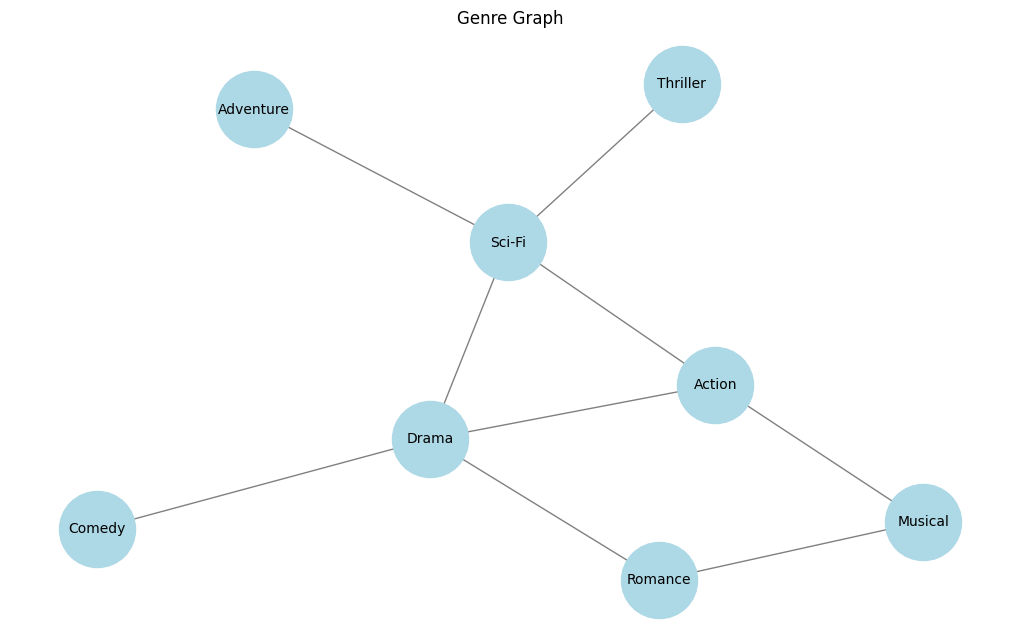

In [49]:
import heapq
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

def build_genre_graph(movie_dict):
    """Builds a graph where genres are nodes and edges exist if movies share genres."""
    genre_graph = {}
    for movie, details in movie_dict.items():
        for genre in details['genres']:
            if genre not in genre_graph:
                genre_graph[genre] = set()
            genre_graph[genre].update(details['genres'])
            genre_graph[genre].remove(genre)
    return genre_graph

def bfs_genre_exploration(start_genres, genre_graph, max_depth):
    """Performs BFS to explore genres up to a certain depth."""
    queue = deque([(genre, 0) for genre in start_genres])
    explored_genres = set(start_genres)
    
    while queue:
        current_genre, depth = queue.popleft()
        if depth >= max_depth:
            continue
        for neighbor in genre_graph.get(current_genre, []):
            if neighbor not in explored_genres:
                explored_genres.add(neighbor)
                queue.append((neighbor, depth + 1))
    
    return explored_genres

def get_movie_recommendations(movie_dict, fav_movie, exploration_pct):
    if fav_movie not in movie_dict:
        print("Movie not found in database.")
        return []
    
    genre_graph = build_genre_graph(movie_dict)
    fav_genres = set(movie_dict[fav_movie]['genres'])
    
    # Define depth of exploration based on percentage
    if exploration_pct <= 20:
        max_depth = 1  # Strictly same genre
    elif exploration_pct <= 50:
        max_depth = 2  # Explore related genres
    else:
        max_depth = 3  # Broader exploration
    
    relevant_genres = bfs_genre_exploration(fav_genres, genre_graph, max_depth)
    
    # Gather movies that belong to relevant genres
    candidate_movies = []
    for movie, details in movie_dict.items():
        if movie == fav_movie:
            continue
        if any(genre in relevant_genres for genre in details['genres']):
            candidate_movies.append((movie, details['rating']))
    
    # Sort by rating
    top_movies = heapq.nlargest(5, candidate_movies, key=lambda x: x[1])
    return [(movie, rating) for movie, rating in top_movies]

# Sample movie database
movie_db = {
    "Inception": {"rating": 8.8, "genres": ["Sci-Fi", "Thriller"]},
    "Interstellar": {"rating": 8.6, "genres": ["Sci-Fi", "Drama"]},
    "The Matrix": {"rating": 8.7, "genres": ["Sci-Fi", "Action"]},
    "The Dark Knight": {"rating": 9.0, "genres": ["Action", "Drama"]},
    "Titanic": {"rating": 7.9, "genres": ["Romance", "Drama"]},
    "La La Land": {"rating": 8.0, "genres": ["Romance", "Musical"]},
    "The Notebook": {"rating": 7.8, "genres": ["Romance", "Drama"]},
    "Avengers: Endgame": {"rating": 8.4, "genres": ["Action", "Sci-Fi"]},
    "Jurassic Park": {"rating": 8.1, "genres": ["Adventure", "Sci-Fi"]},
    "The Grand Budapest Hotel": {"rating": 8.1, "genres": ["Comedy", "Drama"]},
    "The Grand Hotel": {"rating": 8.1, "genres": ["Musical", "Action"]}
}

def display_genre_graph(genre_graph):
    """Displays the genre graph using NetworkX and Matplotlib."""
    G = nx.Graph()
    for genre, neighbors in genre_graph.items():
        for neighbor in neighbors:
            G.add_edge(genre, neighbor)
    
    plt.figure(figsize=(10, 6))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, node_size=3000)
    plt.title("Genre Graph")
    plt.show()

# Taking user input
fav_movie = input("Enter your favorite movie: ")
try:
    exploration_pct = int(input("Enter exploration percentage (0-100): "))
    if exploration_pct < 0 or exploration_pct > 100:
        raise ValueError("Exploration percentage must be between 0 and 100.")
    
    recommendations = get_movie_recommendations(movie_db, fav_movie, exploration_pct)
    
    if recommendations:
        print(f"Your favorite movie: {fav_movie}\nYour exploration percentage: {exploration_pct}")
        print("\nRecommended Movies:")
        for movie, rating in recommendations:
            print(f"- {movie} ({rating})")
    else:
        print("No recommendations available.")

    # Display genre graph
    genre_graph = build_genre_graph(movie_db)
    display_genre_graph(genre_graph)

except ValueError as e:
    print(f"Invalid input: {e}")
